## Pregunta 4:
### ¿Existe una distribución desigual del sexo de las víctimas de violencia intrafamiliar en los casos registrados? 
Hipótesis: Existe una distribución desigual entre el sexo de la víctima, las cuales son en su mayoría mujeres

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sb
import sklearn.cluster as cluster
import sklearn.metrics as metrics
import sklearn.preprocessing
import scipy.cluster.hierarchy as sch
import skfuzzy as fuzz
import pylab
import sklearn.mixture as mixture
import pyclustertend 
import random
from scipy import stats
import seaborn as sns
from scipy.stats import chi2_contingency

df = pd.read_csv('./files/Dataset_Unificado_Proyecto.csv', sep=';', low_memory=False)

Hipótesis: Existe una distribución desigual entre el sexo de la víctima, las cuales son en su mayoría mujeres

In [6]:
df_validos = df[df["VIC_SEXO"].notna()]

In [15]:
conteo = df_validos["VIC_SEXO"].value_counts()

porcentaje_sexo = df_validos["VIC_SEXO"].value_counts(normalize=True) * 100

total_mujeres = (
    conteo.get("Mujeres", 0) +
    conteo.get("2", 0) +
    conteo.get(2, 0)
)

total_hombres = (
    conteo.get("Hombres", 0) +
    conteo.get("1", 0) +
    conteo.get(1, 0)
)

total = total_hombres + total_mujeres

porcentaje_hombre = total_hombres / total * 100
porcentaje_mujer = total_mujeres / total * 100

#tabla de frecuencias

tabla_frecuencias = pd.DataFrame({
    "Sexo": ["Mujeres", "Hombres"],
    "Frecuencia": [total_mujeres, total_hombres]
})

tabla_frecuencias["Frecuencia relativa"] = (
    tabla_frecuencias["Frecuencia"] / tabla_frecuencias["Frecuencia"].sum()
)

tabla_frecuencias["Porcentaje (%)"] = (
    tabla_frecuencias["Frecuencia relativa"] * 100
)

tabla_frecuencias

/var/folders/dc/_dt3fhrs48n2b_4mmncch3440000gp/T/ipykernel_87228/1639265031.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  conteo.get(2, 0)
/var/folders/dc/_dt3fhrs48n2b_4mmncch3440000gp/T/ipykernel_87228/1639265031.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  conteo.get(1, 0)


,Sexo,Frecuencia,Frecuencia relativa,Porcentaje (%)
0,Mujeres,315694,0.712895,71.289467
1,Hombres,127140,0.287105,28.710533


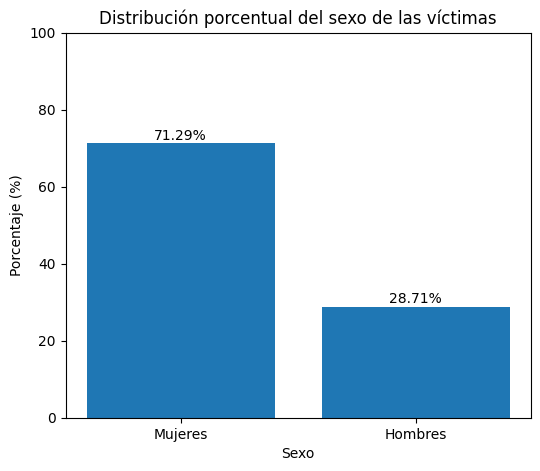

In [12]:
plt.figure(figsize=(6,5))

plt.bar(
    ["Mujeres", "Hombres"],
    [porcentaje_mujer, porcentaje_hombre]
)

plt.title("Distribución porcentual del sexo de las víctimas")
plt.ylabel("Porcentaje (%)")
plt.xlabel("Sexo")
plt.ylim(0, 100)

# Mostrar valores encima de las barras
plt.text(0, porcentaje_mujer + 1, f"{porcentaje_mujer:.2f}%", ha='center')
plt.text(1, porcentaje_hombre + 1, f"{porcentaje_hombre:.2f}%", ha='center')

plt.show()


Análisis de cada sexo individual

/var/folders/dc/_dt3fhrs48n2b_4mmncch3440000gp/T/ipykernel_87228/2642720994.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_validos["SEXO_ANALISIS"] = df_validos["VIC_SEXO"].replace({


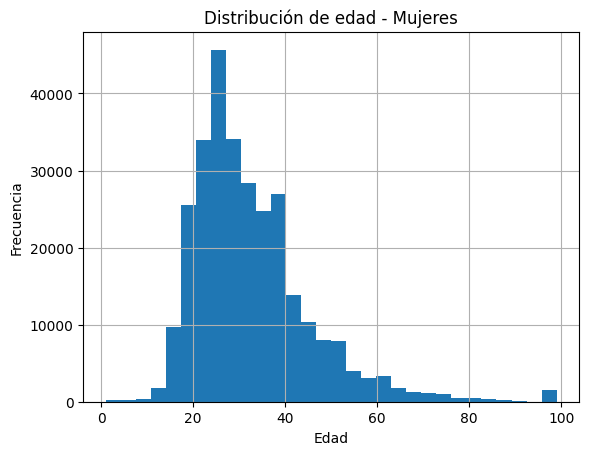

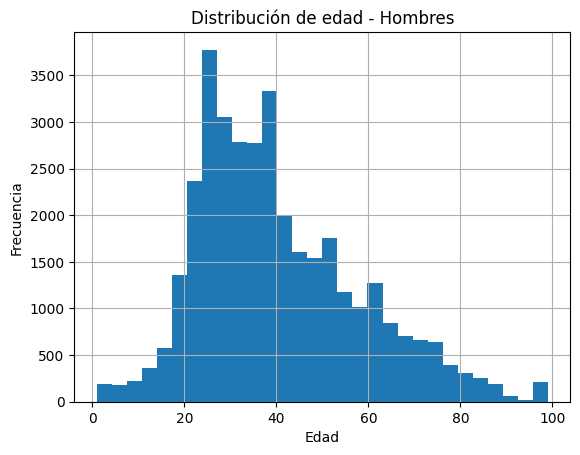

In [18]:
df_validos["SEXO_ANALISIS"] = df_validos["VIC_SEXO"].replace({
    1: "Hombres",
    2: "Mujeres",
    "1": "Hombres",
    "2": "Mujeres"
})

for sexo in df_validos["SEXO_ANALISIS"].unique():
    plt.figure()
    df_validos[df_validos["SEXO_ANALISIS"] == sexo]["VIC_EDAD"].hist(bins=30)
    plt.title(f"Distribución de edad - {sexo}")
    plt.xlabel("Edad")
    plt.ylabel("Frecuencia")
    plt.show()


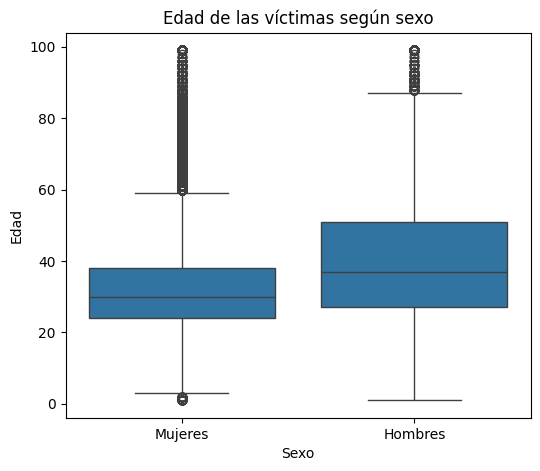

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))

sns.boxplot(data=df_validos, x="SEXO_ANALISIS", y="VIC_EDAD")

plt.title("Edad de las víctimas según sexo")
plt.xlabel("Sexo")
plt.ylabel("Edad")

plt.show()

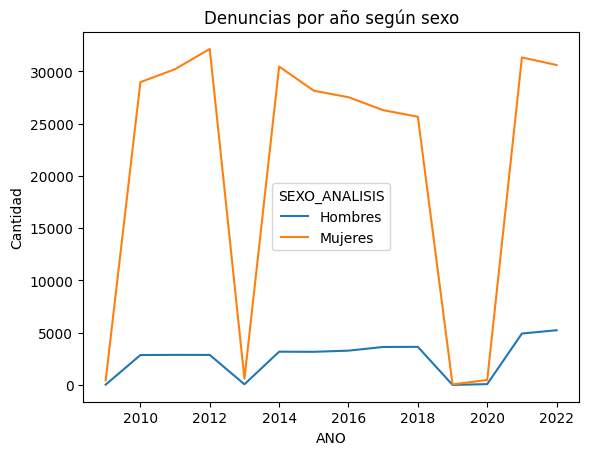

In [20]:
df_validos.groupby(["ANO", "SEXO_ANALISIS"]).size().unstack().plot()

plt.title("Denuncias por año según sexo")
plt.ylabel("Cantidad")
plt.show()

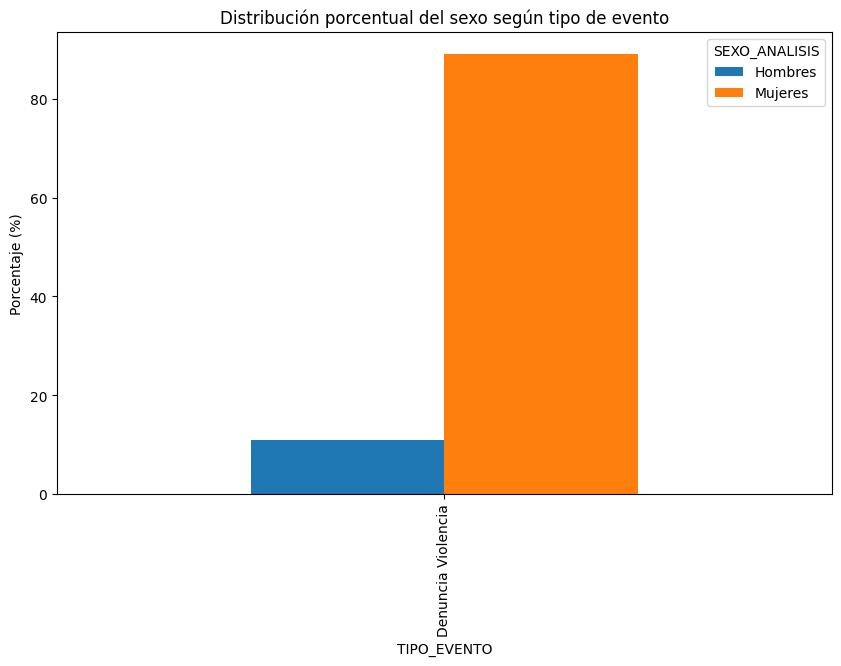

In [21]:
tabla = pd.crosstab(
    df_validos["SEXO_ANALISIS"],
    df_validos["TIPO_EVENTO"],
    normalize="columns"
) * 100

tabla.T.plot(kind="bar", figsize=(10,6))

plt.title("Distribución porcentual del sexo según tipo de evento")
plt.ylabel("Porcentaje (%)")
plt.show()